<a href="https://colab.research.google.com/github/hyeongil2/Modu_DL/blob/main/%EB%84%B7%EC%A7%B8%EB%A7%88%EB%8B%B9_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B3%B8%EA%B8%B0_%EB%8B%A4%EC%A7%80%EA%B8%B0(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13장 과적합 피하기

## 1 데이터의 확인과 실행
- 초음파 광물 예측하기

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/sonar.csv', header =None)
print(df.info())
# 208개의 샘플수, 60개의 속성, 1개의 클래스로 이루어져 있음을 짐작한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [2]:
print(df.head())
# 위에서 보았듯이 60번째 열이 class로 object이다. 
# 데이터형 변환이 필요하다.

       0       1       2       3       4   ...      56      57      58      59  60
0  0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1  0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2  0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3  0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4  0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R

[5 rows x 61 columns]


In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy
import tensorflow as tf

# seed값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

dataset = df.values
X = dataset[:,0:60].astype(float) # model.fit 하다가 error가 나면 입력값을 바꿔주자...
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 5)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# 결과 100% 정확도의 모델이 만들어진다. 정말일까???

Epoch 1/200
42/42 [==============================] - 14s 2ms/step - loss: 0.6844 - accuracy: 0.5403
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.5863
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.6651
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6914
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7494
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7378
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7755
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7959
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8033
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7902
Epoch 11

## 2 과적합 이해하기
- 과적합(overfitting)이란 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는 것을 말한다.
- 과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 떄 생기기도 한다.

## 3 학습셋과 테스트셋
- 과적합을 방지하는 방법으로는 학습을 하는 데이터셋과 이를 테스트할 데이터셋을 완전히 구분한 다음 학습과 동시에 테스트를 병행하며 진행해야 한다.
- 머신러닝의 최종 목적은 새로운 데이터에 사용할 모델을 만드는 것이 최종 목적이므로 테스트셋을 만들어 정확한 평가를 병행하는 것이 중요하다.
- 학습셋만 가지고 평가할때, 층을 더하거나 에포크(epoch) 값을 높여 실행 횟수를 늘리면 정확도가 계속해서 올라간다. 하지만 테스트셋어서도 그대로 나타나지 않는다.

In [18]:
from sklearn.model_selection import train_test_split

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 130, batch_size = 5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 76.1% 예측 성공률을 보인다... 과적합....

Epoch 1/130
29/29 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.5124
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.5705
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2251 - accuracy: 0.6438
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.7237
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.7464
Epoch 6/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.6859
Epoch 7/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.7439
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.7602
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.7140
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.7701
Epoch 11/

In [19]:
# TIP
# 실전에서는 처음 보는 데이터에서도 잘 작동하는 모델을 만들기 위해 훈련을 완전히 새로운 데이터로 한 번 더 테스트를 한다. 
# 이를 위해 학습셋, 테스트셋 외에 또다른 데이터셋을 준비한다. 이떄는 훈련에 쓰이는 데이터셋을 검증셋, 마지막에 테스트하기 위해 준비한 데이터셋을 테스트셋이라고 부른다.

## 4 모델 저장과 재사용

In [20]:
from keras.models import load_model
# 모델 저장
model.save('my_model.h5')

In [21]:
# 재사용
model = load_model('my_model.h5')

In [22]:
from sklearn.model_selection import train_test_split

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 130, batch_size = 5)
model.save('my_model.h5') # 모델을 저장

del model # 테스트를 위해 메모리 내의 모델 삭제
model = load_model('my_model.h5') # 모델 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 저장했다가 다시 불러오니 위와 동일한 결과를 나온것을 확인

Epoch 1/130
29/29 [==============================] - 1s 1ms/step - loss: 0.2502 - accuracy: 0.5124
Epoch 2/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.5705
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2251 - accuracy: 0.6438
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.7237
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.7464
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.6859
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.7439
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.7602
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.7140
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.7701
Epoch 11/

## 5 k겹 교차 검증
- k겹 교차 검증이란 데이터 셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법이다.
- 이렇게 하면 데이터의 100%를 테스트셋으로 사용할 수 있다.

In [25]:
from sklearn.model_selection import StratifiedKFold

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X,Y):
  model = Sequential()
  model.add(Dense(24, input_dim =60, activation = 'relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
  model.fit(X[train], Y[train], epochs =100, batch_size=5)
  k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
  accuracy.append(k_accuracy)

print("\n %.f fold accuracy:" % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 1s 1ms/step - loss: 0.2429 - accuracy: 0.5553
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.6556
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.7614
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.7747
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.7360
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.7474
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.7428
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.7558
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.8050
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.8428
Epoch 11/

# 14장 베스트 모델 만들기


## 1 데이터의 확인과 실행
- 와인의 종류 예측하기

In [30]:
df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)
# frac = 1이라고 지정하면 원본 데이터의 100%를 불러오라는 의미
# 0.5 이면 50%만 랜덤으로 불러온다.

In [31]:
print(df.head(5))

       0     1     2      3      4     5   ...       7     8     9     10  11  12
5773  6.3  0.24  0.22  11.90  0.050  65.0  ...  0.99659  3.06  0.58   9.3   6   0
5043  6.7  0.30  0.44  18.75  0.057  65.0  ...  0.99956  3.11  0.53   9.1   5   0
4555  8.1  0.12  0.38   0.90  0.034  36.0  ...  0.99026  2.80  0.55  12.0   6   0
1753  8.2  0.23  0.40   7.50  0.049  12.0  ...  0.99660  3.06  0.84   9.7   6   0
4799  5.2  0.31  0.36   5.10  0.031  46.0  ...  0.98970  3.14  0.31  12.4   7   0

[5 rows x 13 columns]


In [32]:
print(df.info())
# 총 6497개의 샘플, 13개의 속성이 있다.
# 0 - 주석산 농도
# 1 - 아세트산 농도
# 2 - 구연산 농도
# 3 - 잔류 당분 농도
# 4 - 염화나트륨 농도
# 5 - 유리 아황산 농도
# 6 - 총 아황산 농도
# 7 - 밀도
# 8 - pH
# 9 - 황산칼륨 농도
# 10 - 알코올 도수
# 11 - 와인의 맛(0~10등급)
# 12 - class(1:레드와인, 0:화이트와인)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5773 to 5556
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)
dataset = df.values
X = dataset[:, 0:12].astype(float)
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs =200, batch_size=200)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# 98.61% 딥러닝 프레임워크 완성

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 1.0185 - accuracy: 0.7309
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8739
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9215
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9249
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9269
Epoch 6/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9265
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9347
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.9301
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9336
Epoch 10/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9404
Epoch 11/

## 2 모델 업데이트하기

In [45]:
import os

MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [46]:
from keras.callbacks import ModelCheckpoint

In [48]:
checkpointer = ModelCheckpoint(filepath=modelpath, moniter = 'val_loss', verbose=1)
# 모니터할 값을 지정
# 테스트 오차는 케라스 내부에서 val_loss로 기록된다.(학습셋 오차는 loss로)
# verbose = 로 정하면 함수의 진행 사항이 출력, 0이면 출력 x

In [ ]:
model.fit(X, Y, validation_split=0.2, epochs = 200, batch_size=200, verbose = 0, callbacks = [checkpointer])
# 200개의 모델이 저장되고 저장된 파일의 이름은 에포크 수와 이때의 테스트셋 오차이다.

In [51]:
# 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하게끔 하려면 save_best_only 값을 True로 지정
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose= 1, save_best_only = True)

# 모델 실행 및 저장
model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks=[checkpointer])

# Epoch 00190: val_loss improved from 0.04928 to 0.04920, saving model to ./model/190-0.0492.hdf5 이 최종 저장된것을 확인


Epoch 00001: val_loss improved from inf to 0.38706, saving model to ./model/01-0.3871.hdf5

Epoch 00002: val_loss improved from 0.38706 to 0.28561, saving model to ./model/02-0.2856.hdf5

Epoch 00003: val_loss improved from 0.28561 to 0.24630, saving model to ./model/03-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24630 to 0.23385, saving model to ./model/04-0.2338.hdf5

Epoch 00005: val_loss improved from 0.23385 to 0.22901, saving model to ./model/05-0.2290.hdf5

Epoch 00006: val_loss improved from 0.22901 to 0.22135, saving model to ./model/06-0.2214.hdf5

Epoch 00007: val_loss improved from 0.22135 to 0.21528, saving model to ./model/07-0.2153.hdf5

Epoch 00008: val_loss improved from 0.21528 to 0.20855, saving model to ./model/08-0.2086.hdf5

Epoch 00009: val_loss improved from 0.20855 to 0.19963, saving model to ./model/09-0.1996.hdf5

Epoch 00010: val_loss improved from 0.19963 to 0.19792, saving model to ./model/10-0.1979.hdf5

Epoch 00011: val_loss improved from 0.19792

## 3 그래프로 확인하기
- 에포크를 얼마나 지정할지 그래프를 통해 확인하기

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0346 - accuracy: 0.9922 - val_loss: 0.0646 - val_accuracy: 0.9814
Epoch 1002/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0279 - accuracy: 0.9952 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 1003/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0326 - accuracy: 0.9939 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 1004/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0284 - accuracy: 0.9946 - val_loss: 0.0630 - val_accuracy: 0.9814
Epoch 1005/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0290 - accuracy: 0.9946 - val_loss: 0.0693 - val_accuracy: 0.9814
Epoch 1006/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.0387 - accuracy: 0.9899 - val_loss: 0.0653 - val_accuracy: 0.9814
Epoch 1007/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0339 - accuracy: 0.991

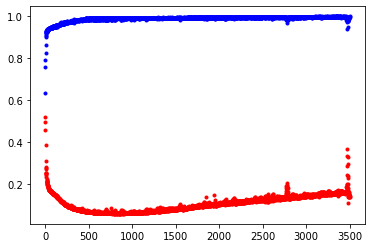

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import tensorflow as tf

df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose= 1, save_best_only = True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

import matplotlib.pyplot as plt
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len ,y_vloss, "o", c= 'red', markersize = 3)
plt.plot(x_len, y_acc, "o", c= 'blue', markersize = 3)

plt.show()
# 그래프를 보면 학습셋의 정확도는 시간이 흐를수록 좋아지지만 테스트 결과는 어느정도 이상 시간이 지나면 나아지지 않는것을 확인!!

## 4 학습의 자동 중단
- EarlyStopping() 함수는 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수다.


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim =12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100) # 100번까지 참겠다.

# 모델 실행
model.fit(X, Y, validation_split =0.2, epochs =2000, batch_size = 500, callbacks = [early_stopping_callback])

# 결과출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# Epoch가 2000 중에 1233일떄 멈춘다.
# Epoch 1233/2000
# 2/2 [==============================] - 0s 33ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0652 - val_accuracy: 0.9897
# 31/31 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9908

#  Accuracy: 0.9908

Epoch 1/2000
2/2 [==============================] - 1s 246ms/step - loss: 2.1001 - accuracy: 0.7251 - val_loss: 1.2069 - val_accuracy: 0.7744
Epoch 2/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.5713 - accuracy: 0.7224 - val_loss: 0.8604 - val_accuracy: 0.7744
Epoch 3/2000
2/2 [==============================] - 0s 19ms/step - loss: 1.0754 - accuracy: 0.7304 - val_loss: 0.5777 - val_accuracy: 0.7744
Epoch 4/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.7344 - accuracy: 0.7207 - val_loss: 0.7210 - val_accuracy: 0.6256
Epoch 5/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.7390 - accuracy: 0.5978 - val_loss: 0.8500 - val_accuracy: 0.4615
Epoch 6/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.7672 - accuracy: 0.5388 - val_loss: 0.5361 - val_accuracy: 0.7333
Epoch 7/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.5686 - accuracy: 0.7112 - val_loss: 0.4439 - val_accuracy: 0.7692
Epoch 8/2000

In [10]:
# 최종 코드 : 모델 업데이트 함수와 학습 자동 중단 함수를 동시에 사용!!!!
from keras.models import Sequential
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed값 결정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model= Sequential()
model.add(Dense(30, input_dim =12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True) # verbose 1 이면 진행상황 알려줌

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience =100)

model.fit(X,Y, validation_split=0.2, epochs = 3500, batch_size=500, verbose = 0, callbacks = [early_stopping_callback, checkpointer])

# Epoch 가 1133 일때  마지막으로 저장되었고 그 이후 100번가량 모델이 나아지지 않아 학습이 자동 중단 된것을 알 수 있다.
# Epoch 01133: val_loss improved from 0.05731 to 0.05717, saving model to ./model/1133-0.0572.hdf5


Epoch 00001: val_loss improved from inf to 1.20689, saving model to ./model/01-1.2069.hdf5

Epoch 00002: val_loss improved from 1.20689 to 0.86036, saving model to ./model/02-0.8604.hdf5

Epoch 00003: val_loss improved from 0.86036 to 0.57772, saving model to ./model/03-0.5777.hdf5

Epoch 00004: val_loss did not improve from 0.57772

Epoch 00005: val_loss did not improve from 0.57772

Epoch 00006: val_loss improved from 0.57772 to 0.53606, saving model to ./model/06-0.5361.hdf5

Epoch 00007: val_loss improved from 0.53606 to 0.44392, saving model to ./model/07-0.4439.hdf5

Epoch 00008: val_loss improved from 0.44392 to 0.44263, saving model to ./model/08-0.4426.hdf5

Epoch 00009: val_loss improved from 0.44263 to 0.43577, saving model to ./model/09-0.4358.hdf5

Epoch 00010: val_loss improved from 0.43577 to 0.41058, saving model to ./model/10-0.4106.hdf5

Epoch 00011: val_loss improved from 0.41058 to 0.37876, saving model to ./model/11-0.3788.hdf5

Epoch 00012: val_loss improved from

# 15장 선형 회귀 적용하기
- 주어진 환경 요인과 집값의 변동을 학습해서 환경 요인만 놓고 집값을 예측해보자

## 1 데이터 확인하기
- 보스턴 집값 예측하기

In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv', delim_whitespace=True, header= None)
# delim_whitespace : bool, 기본값 False
# 공백 문자 (예 : ' ' 또는 '    ' )를 sep로 사용 할지 여부를 지정합니다 . sep='\s+' 설정과 같습니다 .
# 이 옵션을 True로 설정하면 delimiter 매개 변수 에 아무것도 전달되지 않아야합니다 .

print(df.info())
# 총 샘플의 수 506개, 13개의 속성과 1개의 클래스
# 0 CRIM: 인구 1인당 범죄 발생 수
# 1 ZN: 25,000평방 피트 이상의 주거 구역 비중
# 2 INDUS: 소매업 외 상업이 차지하는 면적 비율
# 3 CHAS: 찰스강 위치 변수(1: 강 주변, 0: 이외)
# 4 NOX: 일산화질소 농도
# 5 RM: 집의 평균 방 수
# 6 AGE: 1940년 이전에 지어진 비율
# 7 DIS: 5가지 보스턴 시 고용 시설까지의 거리
# 8 RAD: 순환고속도로의 접근 용이성
# 9 TAX: $10,000당 부동산 세율 총계
# 10 PTRATIO: 지역별 학생과 교사 비율
# 11 B: 지역별 흑인 비율
# 12 LSTAT: 급여가 낮은 직업에 종사하는 인구 비율(%)
# 13 가격(단위: $1,000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [38]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

# seed값 설정
# 3일떄만 ... 이상하네????....
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed) # 다르게 하니깐 값이 산으로 간다

df = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv', delim_whitespace=True, header= None)

dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
 
# 선형 회귀 데이터는 마지막에 참과 거짓을 구분할 필요가 없다.
# 출력층에 활성화 함수를 지정할 필요도 없다.
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)
  
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten() 
# flatten() 함수는 데이터 배열이 몇 아원이든 모두 1차원으로 바꿔 읽기 쉽게 해주는 함수다.
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Epoch 1/200
36/36 [==============================] - 1s 2ms/step - loss: 13938.3500
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 867.7925
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 554.6099
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 432.8176
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 268.1740
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 198.6784
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 140.0099
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 119.8737
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 87.7924
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 91.7122
Epoch 11/200
36/36 [==============================] - 0s 2ms/step - loss: 77.0876
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 69.2406
Epoch 13/200
36